In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("/content/marketing_campaign_dataset.csv")
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [16]:
df.shape

(200000, 16)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [18]:
df.describe()

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


**Correlation Heatmap**

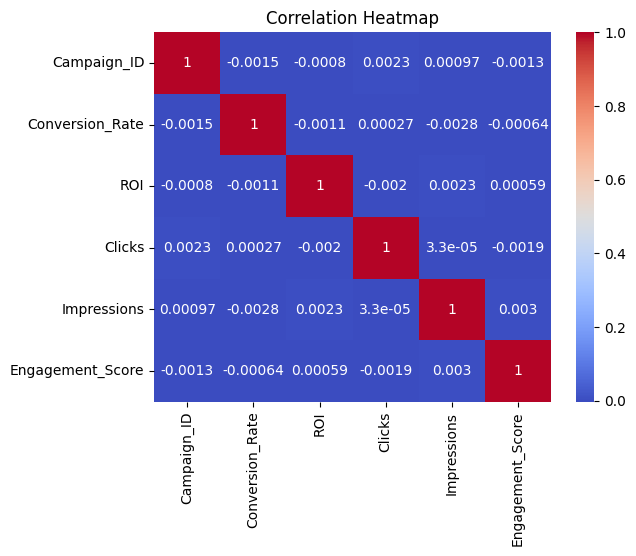

In [19]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Distribution of Numerical Features**

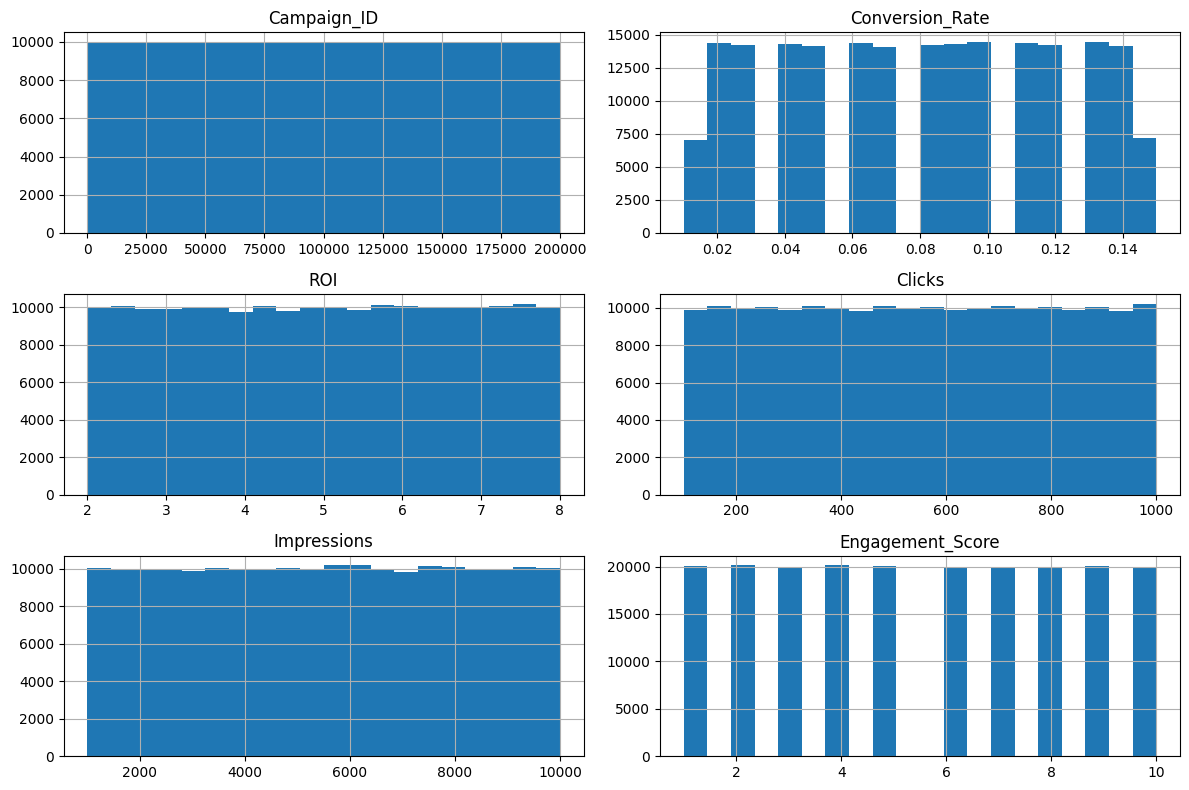

In [20]:
num_cols = df.select_dtypes(include=np.number).columns

df[num_cols].hist(figsize=(12,8), bins=20)
plt.tight_layout()
plt.show()

**Categorical Features Overview**

In [21]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for Company:
Company
TechCorp               40237
Alpha Innovations      40051
DataTech Solutions     40012
NexGen Systems         39991
Innovate Industries    39709
Name: count, dtype: int64

Value counts for Campaign_Type:
Campaign_Type
Influencer      40169
Search          40157
Display         39987
Email           39870
Social Media    39817
Name: count, dtype: int64

Value counts for Target_Audience:
Target_Audience
Men 18-24      40258
Men 25-34      40023
All Ages       40019
Women 25-34    40013
Women 35-44    39687
Name: count, dtype: int64

Value counts for Duration:
Duration
30 days    50255
45 days    50100
60 days    49866
15 days    49779
Name: count, dtype: int64

Value counts for Channel_Used:
Channel_Used
Email         33599
Google Ads    33438
YouTube       33392
Instagram     33392
Website       33360
Facebook      32819
Name: count, dtype: int64

Value counts for Acquisition_Cost:
Acquisition_Cost
$16,578.00    32
$6,570.00     31
$9,128.00     30
$8,

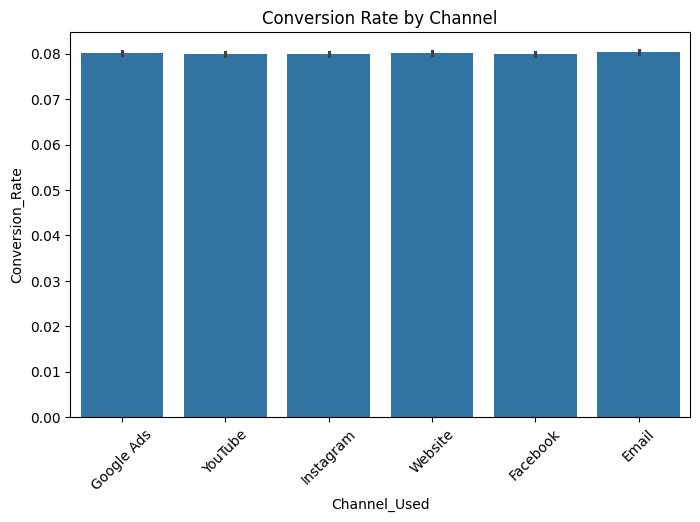

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(x='Channel_Used', y='Conversion_Rate', data=df)
plt.xticks(rotation=45)
plt.title("Conversion Rate by Channel")
plt.show()

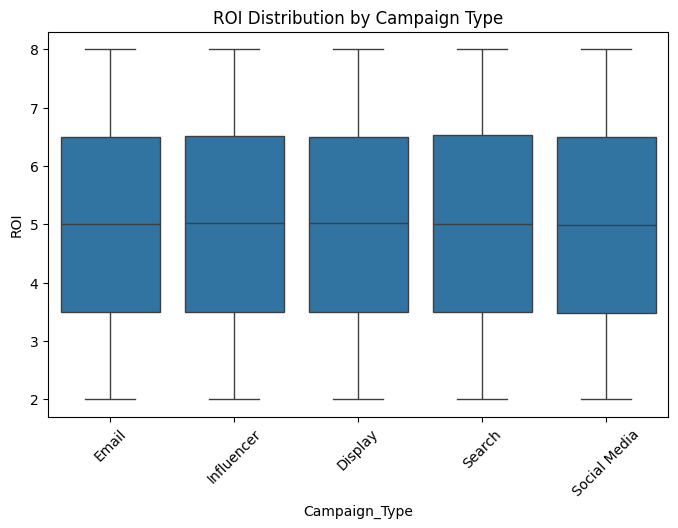

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Campaign_Type', y='ROI', data=df)
plt.xticks(rotation=45)
plt.title("ROI Distribution by Campaign Type")
plt.show()

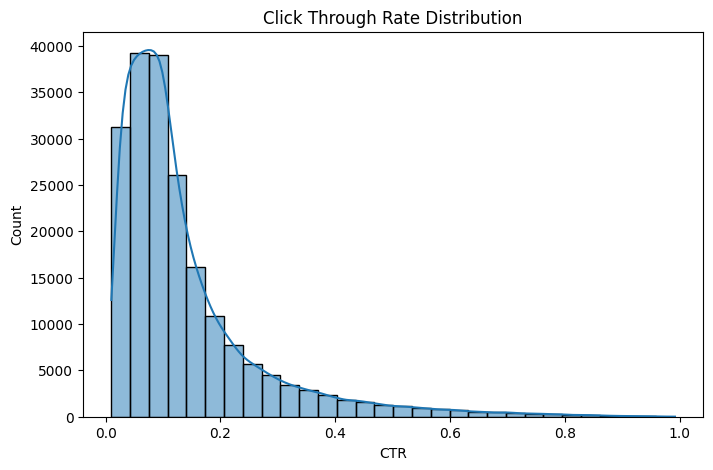

In [26]:
df['CTR'] = df['Clicks'] / df['Impressions']

plt.figure(figsize=(8,5))
sns.histplot(df['CTR'], bins=30, kde=True)
plt.title("Click Through Rate Distribution")
plt.show()

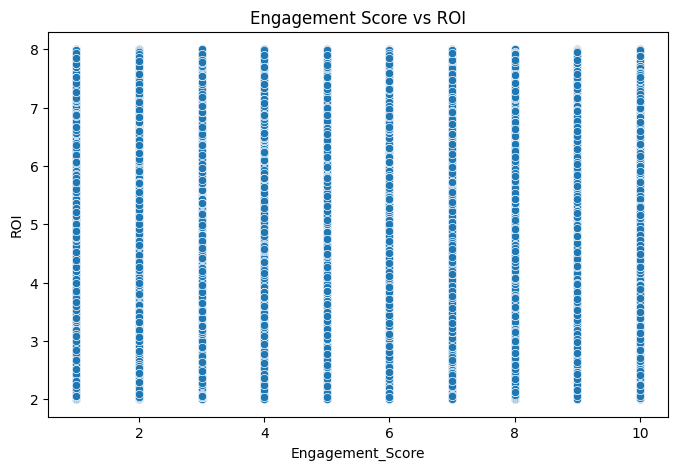

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Engagement_Score', y='ROI', data=df)
plt.title("Engagement Score vs ROI")
plt.show()

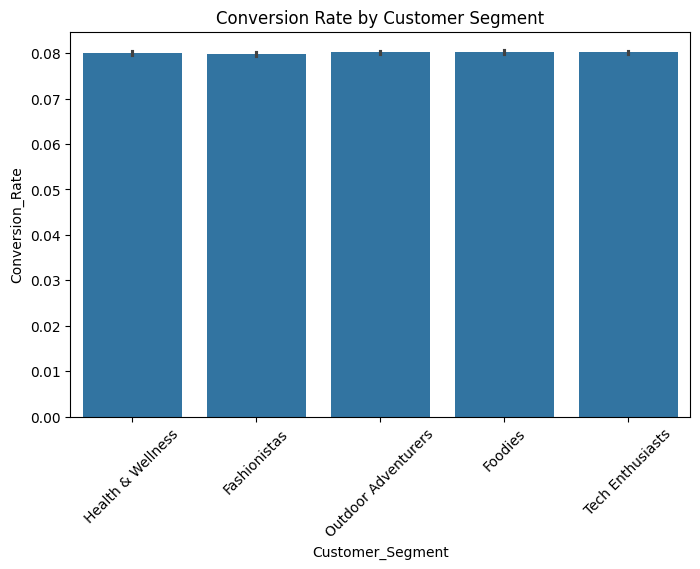

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x='Customer_Segment', y='Conversion_Rate', data=df)
plt.xticks(rotation=45)
plt.title("Conversion Rate by Customer Segment")
plt.show()

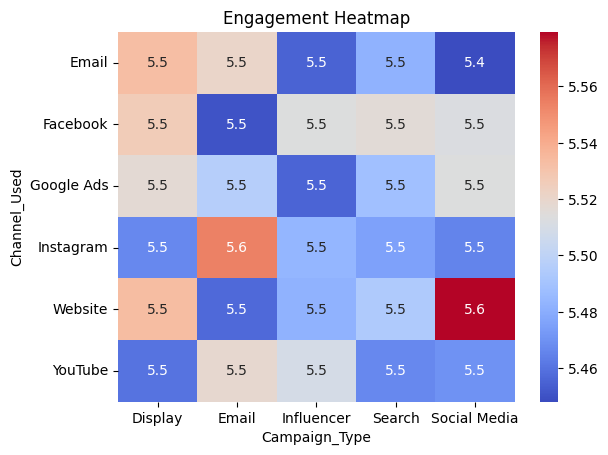

In [33]:
pivot = df.pivot_table(values='Engagement_Score',
                       index='Channel_Used',
                       columns='Campaign_Type',
                       aggfunc='mean')

sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Engagement Heatmap")
plt.show()

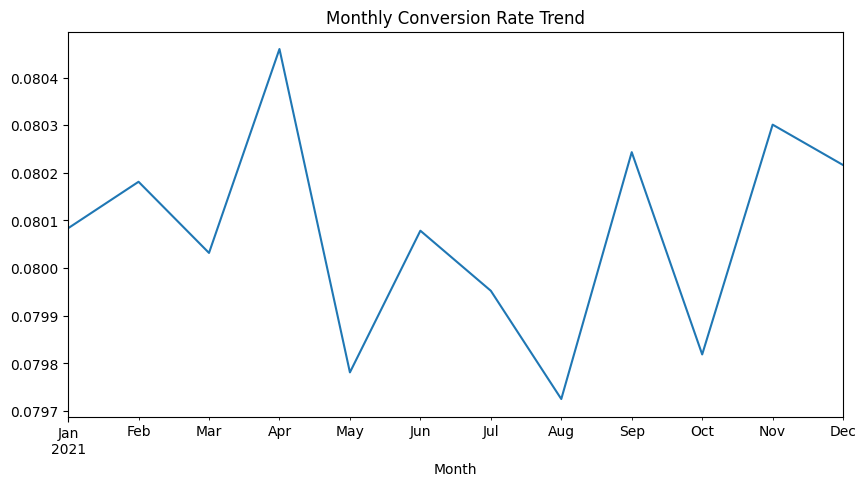

In [34]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

monthly_conv = df.groupby('Month')['Conversion_Rate'].mean()

monthly_conv.plot(figsize=(10,5))
plt.title("Monthly Conversion Rate Trend")
plt.show()

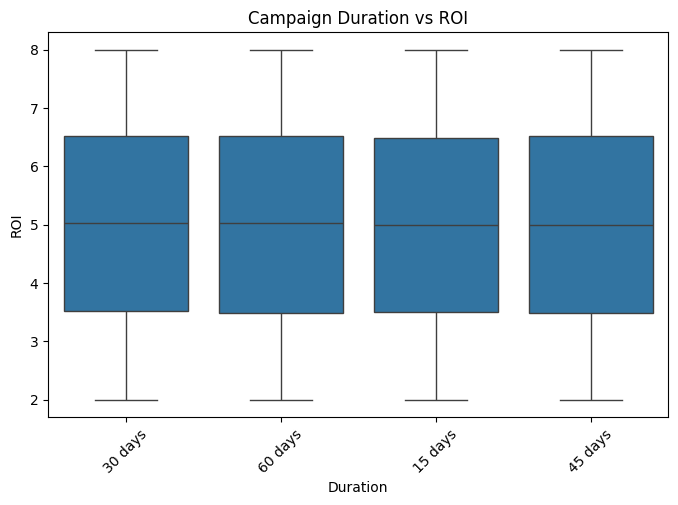

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Duration', y='ROI', data=df)
plt.xticks(rotation=45)
plt.title("Campaign Duration vs ROI")
plt.show()

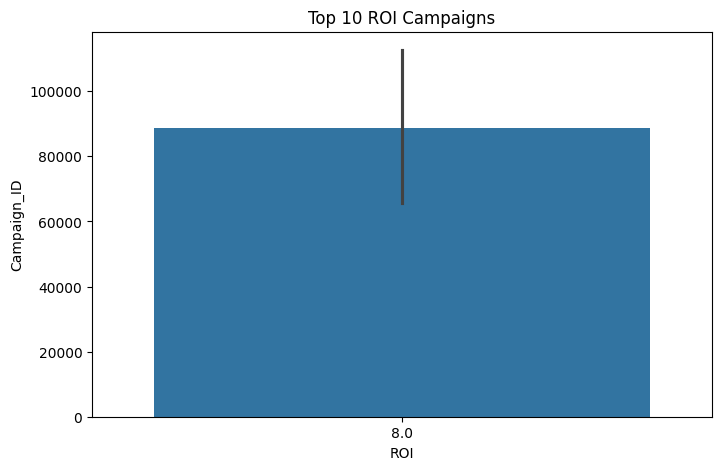

In [38]:
top_roi = df.sort_values(by='ROI', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='ROI', y='Campaign_ID', data=top_roi)
plt.title("Top 10 ROI Campaigns")
plt.show()

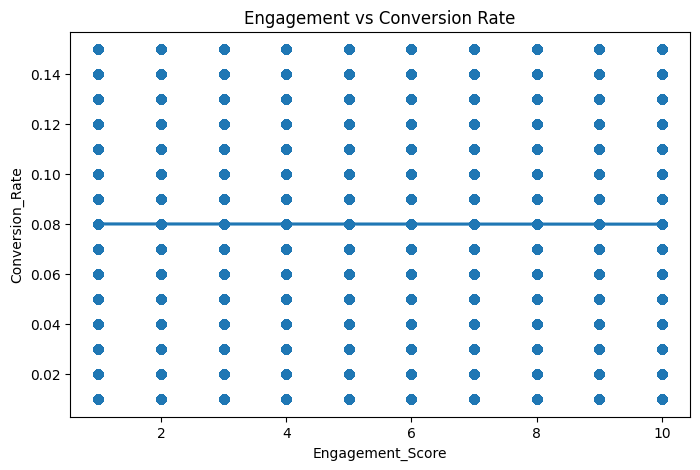

In [39]:
plt.figure(figsize=(8,5))
sns.regplot(x='Engagement_Score', y='Conversion_Rate', data=df)
plt.title("Engagement vs Conversion Rate")
plt.show()

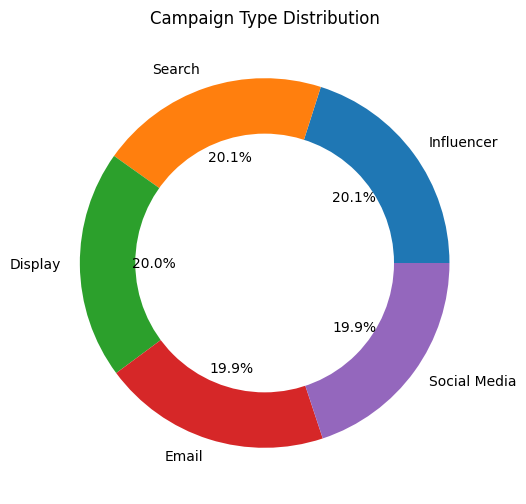

In [41]:
campaign_counts = df['Campaign_Type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(campaign_counts, labels=campaign_counts.index, autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Campaign Type Distribution")
plt.show()